In [1]:
pwd

'/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/python'

In [2]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots' 

In [3]:
import nbformat
#prose_img_path = 'figures/proseplots/'

In [4]:
def savestyle(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.mplstyle'
    path = '../../stylelib/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [5]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [6]:
# preface - imports

In [7]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris 

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
# import ternary # requires install
# from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
savepy('imports')

In [9]:
# versions

In [10]:
!python --version

Python 3.9.13


In [11]:
mpl.__version__

'3.7.1'

In [12]:
# OOP

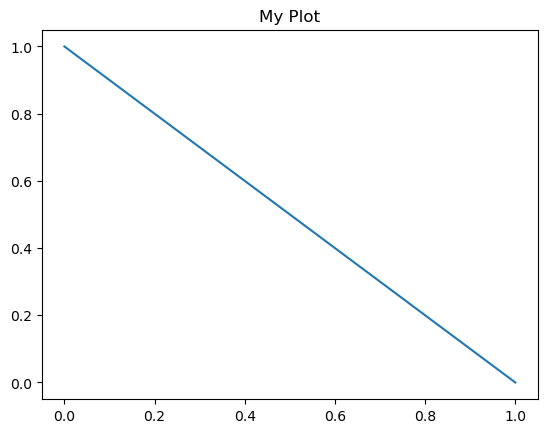

In [13]:
import matplotlib.pyplot as plt
x = 1,0
y = 0,1

plt.plot(x,y)
plt.title("My Plot")
#truncate
plt.savefig('matlab-plot.pdf')
plt.show()

In [14]:
savepy('matlab-plot')

In [15]:
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set_title("My Plot")
#truncate
plt.tight_layout()
plt.savefig('oop-plot.pdf')
plt.close()

In [16]:
savepy('oop-plot')

In [17]:
fig = plt.figure(figsize = (2,3),
                 facecolor = 'gray') 
ax = plt.axes(facecolor = 'lightyellow')
#truncate
plt.tight_layout()
plt.savefig('figparams.pdf')
plt.close()

In [ ]:
savepy('figparams')

In [ ]:
x = np.linspace(0,1,2)   
fig, ax = plt.figure(figsize = (8,4)), plt.axes()
ax.plot(x, x)
ax.plot(x, 1 - x)
ax.set_title("My Chart")
print(ax.title)
print(ax.get_title())  # Similar to above line
ax.set_title("My Wholesome Chart")
print(ax.get_title())  # long      
#truncate
plt.tight_layout()
plt.savefig('gettersetter.pdf')
plt.show()

In [ ]:
savepy('gettersetter')

In [ ]:
# OOP - mixing the interfaces

In [ ]:
x = np.linspace(0,1,2) 
plt.plot(x,x)
plt.title("My Chart")

ax = plt.gca()
print(ax.title)

ax.plot(x, 1 - x)
ax.set_title('My Wholesome Chart')
print(ax.title)
#truncate
fig = plt.gcf()
fig.savefig('chart.pdf') # same as plt.savefig

In [ ]:
savepy('chart')

In [ ]:
# OOP Start 
fig, ax = plt.figure(figsize = (8,5)), plt.axes()

x = np.linspace(0,100,2)
ax.plot(x, x, color = 'gray')

ax.set_xlim([0,100])
ax.set_ylim([0,100])

# Back to pyplot functions
for i in range(101):
    plt.axvline(i,0, i / 100, color = 'C' + str(i))
    plt.axvline(i, i/100, 1, color = 'C' + str(i+5))
    
plt.axis('off')
plt.savefig('colorful.pdf')
#truncate
fig.savefig('chart.pdf')

In [ ]:
savepy('colorful')

In [ ]:
from sklearn.datasets import load_iris 
data = load_iris()['data']
df = pd.DataFrame(data)

fig, ax = plt.figure(), plt.axes()

df.plot.box(ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.tight_layout()
plt.savefig('irisbox.pdf')

In [ ]:
savepy('irisbox')

In [ ]:
# Chapter 2 Ticks

In [ ]:
fig, ax = plt.figure(), plt.axes()
#truncate
plt.tight_layout()
plt.savefig("empty.pdf")

In [ ]:
savepy('empty')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig("empty-square.pdf")

In [ ]:
savepy('empty-square')

In [ ]:
fig, ax = plt.figure(), plt.axes()

for i in range(1,4):
    ax.plot([0,i], [i,i])
    bottom_y, top_y = ax.get_ylim()
    left_x, right_x = ax.get_xlim()
    ax.fill_between(x = [left_x,right_x], 
                    y1 = bottom_y, 
                    y2 = top_y, 
                    alpha = 0.5/i)

# Prevent limits from automatically stretching further
# The last fill_between would stretch limits again
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x, right_x)
#truncate
plt.tight_layout()
plt.savefig("expanding-lims.pdf")

In [ ]:
savepy('expanding-lims')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Create a unit circle
u = np.linspace(0,2*np.pi,100)
x = np.cos(u)
y = np.sin(u)

# Default, clip_on = True
ax.plot(x-1, y)

# Unclipped, extends beyond the axes
ax.plot(x+1, y, clip_on = False)

ax.set_xlim(-1,1)
#truncate
plt.tight_layout()
plt.savefig("circle-clip.pdf")

In [ ]:
savepy('circle-clip')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
ax.axis('off')
#truncate
plt.savefig("no-axis.pdf")
plt.show()

In [ ]:
savepy("no-axis")

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
#truncate
plt.savefig("yes-axis.pdf")
plt.show()

In [ ]:
savepy('yes-axis')

In [ ]:
for spine in 'bottom', 'top', 'left', 'right':
    fig, ax = plt.figure(), plt.axes()
    ax.set_title("No " + spine.title() + " Spine")
    ax.spines[spine].set_visible(False)
    plt.show()
    #truncate
    fig.savefig(f"spine-vis-{spine}.pdf")

In [ ]:
savepy('spine-vis')

In [ ]:
fig, ax = plt.figure(), plt.axes(facecolor = 'lightyellow')
ax.set_title("Thick Spines")
for spine in 'bottom', 'top', 'left', 'right':
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.savefig("thick-spines.pdf")
plt.show()

In [ ]:
savepy('thick-spines')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines")
ax.plot([-1,1], [-1,1]) 
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')
#truncate
plt.savefig("zero-spines.pdf")
plt.show()

In [ ]:
savepy("zero-spines")

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines and Arrows")
ax.plot([-1,1], [-1,1])
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')

# get current limits
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Add arrows
ax.plot(xlims[1], 0, ">k", clip_on = False)
ax.plot(0, ylims[1], "^k", clip_on = False)

# revert limits to before the arrows
ax.set_xlim(xlims)
ax.set_ylim(ylims)
#truncate
plt.savefig("arrow-axes.pdf")

In [ ]:
savepy('arrow-axes')

In [ ]:
# ticks

In [ ]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

# Y axis
ax.set_yticks( [-0.5, 0, 0.5] )
ax.set_yticklabels( [r"$-\frac{1}{2}$", 0,  r"$\frac{1}{2}$"] )

# X axis
ax.xaxis.set_ticks([np.pi])
ax.xaxis.set_ticklabels([r"$\pi$"])
#truncate
plt.savefig("ticks1.pdf")

In [ ]:
savepy('ticks1')

In [ ]:
heights = pd.Series( {'Shaq': 7 + (1/12),
                     'Yao Ming': 7.5,
                     'Delle Donne': 6 + (5/12)})

fig, ax = plt.figure(figsize = (4,7)), plt.axes()

heights.plot.bar(ax = ax, 
        color = ['#FDB927', '#BA0C2F', '#0C2340'], 
        edgecolor = ['#552583', '#041E42', '#C8102E'],
        linewidth = 2)
# https://teamcolorcodes.com/ 
# LA Lakers and Houston Rockets and DC Mystics

# Get rid of ticks on x-axis, rotate text
ax.xaxis.set_tick_params(length = 0, which = 'major', 
                         rotation = 0)

ylim0, ylim1 = 0,8
ax.set_ylim([ylim0, ylim1])

ax.set_yticks(range(ylim0, ylim1+1))
#ax.yaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(1/12))
ax.yaxis.set_tick_params(length = 1, which = 'minor')
ax.yaxis.set_tick_params(length = 2, which = 'major')

ax.set_ylabel("Height (feet)")
ax.set_title("Pro Basketball Players are Tall")
#truncate
plt.savefig("tall-ballers.pdf")

In [ ]:
savepy('tall-ballers')

In [ ]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

ax.xaxis.set_major_locator(MultipleLocator(np.pi))
#truncate
plt.savefig("mult-locator.pdf")
plt.show()

In [ ]:
savepy('mult-locator')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(10, 30, 1)
y = np.random.normal(size = len(x))
ax.plot(x,y)

# set what ticks are shown
ax.xaxis.set_ticks(x)

# move the ticks
ax.yaxis.tick_right()
ax.xaxis.set_ticks_position('top')

ax.set_title("Some Plot")
#truncate
plt.savefig('tick-right.pdf')
plt.show()

In [ ]:
savepy('tick-right')

In [ ]:
## ticks - grids

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(False)
#truncate
plt.savefig("grid-false.pdf")

In [ ]:
savepy('grid-false')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(True)
#truncate
plt.tight_layout()
plt.savefig("grid-true.pdf")
plt.show()

In [ ]:
savepy('grid-true')

In [ ]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0, 10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])
#truncate
plt.tight_layout()
plt.savefig("y-grid-false.pdf")
plt.show()

In [ ]:
savepy('y-grid-false')

In [ ]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])

# Add grid and line of best fit
ax.yaxis.grid(True)
ax.plot(x, y, color = 'black')
#truncate
plt.tight_layout()
plt.savefig("y-grid-true.pdf")
plt.show()

In [ ]:
savepy('y-grid-true')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
#truncate
plt.tight_layout()
plt.savefig("grids-auto.pdf")
plt.show()

In [ ]:
savepy('grids-auto')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#truncate
plt.tight_layout()
plt.savefig("grids-multi.pdf")
plt.show()

In [ ]:
savepy('grids-multi')

In [ ]:
# ELEMENTS 

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Patches
rect = plt.Rectangle(xy = (0.2, 0.2),
                     width = 0.6,
                     height = .6,
                     facecolor = 'C0',
                     edgecolor = 'C1')
patch = ax.add_artist(rect)

# Lines
x, y = [0.5, 0.5], [0, 1]
line, = ax.plot(x, y) 
lines = ax.plot(y,x)

# Text
text = ax.text(0.2, 0.8, 'Matlotlib', size = 13)
#truncate
plt.tight_layout()
plt.savefig("artists.pdf")
plt.show()

In [ ]:
savepy("artists")

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_yticks([])

# make colors
green = (.9, .99, .9)
blue = (.9, .9, .99)
red = (.99, .9, .9)

# Text with default zorder of 3
text = ax.text(0.5, 0.5, "Hello, world!",
               size = 30,
               ha = 'center',
               va = 'center')

# Lines with default zorder of 2
line1 = ax.axvline(0.65,
                   linewidth = 10,
                   color = blue)
line2 = ax.plot([0.35, 0.35], [.05, .95],
                linewidth = 10, 
                color = blue)

# Patches with default zorder of 1
patch1 = ax.fill_between([0,1], 0.45, .55,
                         facecolor = green,
                         edgecolor = 'black')
patch2 = ax.fill_between([.48,.52], 0, 1,
                         facecolor = red, 
                         edgecolor = 'black',
                         linewidth = 2)

# Check zorders
print(text.get_zorder())
print(line1.get_zorder())
print(line2[0].get_zorder())
print(patch1.get_zorder())
print(patch2.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-z.pdf")
plt.show()

In [ ]:
savepy('default-z')

In [ ]:
fig, ax = plt.figure(), plt.axes()

print(fig.get_zorder())
print(ax.get_zorder())

for i in [0, 0.25, .5, .75]:
    
    t = ax.fill_between([i, 1], 0.4 - i/10, .6 - i/20,
                        zorder = 1 - i)
    print(t.get_zorder())

ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.tight_layout()
plt.savefig("reverse-z.pdf")
plt.show()

In [ ]:
savepy('reverse-z')

In [ ]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-axes.pdf")
plt.show()

In [ ]:
savepy('default-axes')

In [ ]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_axisbelow(False)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("front-axes.pdf")
plt.show()

In [ ]:
savepy('front-axes')

In [ ]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.xaxis.set_zorder(3)
#truncate
plt.tight_layout()
plt.savefig("front-xaxis.pdf")
plt.show()

In [ ]:
savepy("front-xaxis")


In [ ]:
## coordinate systems

In [ ]:
fig, ax = plt.figure(facecolor = 'lightgray'), plt.axes()

ax.plot([0, 1], [0, 1],
        linewidth = 3,
        transform = ax.transAxes,
        label = 'axes')

ax.plot([0, 1], [0, 1],
        color = 'C1',
        linewidth = 1,
        transform = fig.transFigure,
        clip_on = False,
        label = 'figure')

ax.plot([0, 1], [0, 1],
        color = 'C2',
        linestyle = 'dashed',
        clip_on = False,
        label = 'data')

ax.set_xlim(0,2)
ax.legend()
#truncate
plt.tight_layout()
plt.savefig('coords.pdf', facecolor = 'lightgray')
plt.show()

In [ ]:
savepy('coords')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.axis('off')
# lines to horizon
for i in np.linspace(0,1,50):
    ax.plot([i,.5], [0.00, .5], 
            transform = ax.transAxes,
            linewidth = 2,
            zorder = 10-(i-0.5)**2)

# fill bottom half
green = (.1, .5, .1)
ax.fill_between(x = (0,1),
                y1 = 0,
                y2 = 0.5,
                transform = ax.transAxes,
                color = green)

# fill top half
ax.fill_between(x = (0,1),
                y1 = 0.5,
                y2 = 1,
                transform = ax.transAxes,
                color = 'lightblue')
#truncate
plt.tight_layout()
plt.savefig("coord-horizon.pdf")
plt.show()

In [ ]:
savepy('coord-horizon')

In [ ]:
# Plot setup 
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0, 2*np.pi)
sin, = ax.plot(x, 3*np.sin(x))
ax.set_xlim(0, 10)
ax.set_ylim(-4, 6)
fig.tight_layout()

# Vertical line with axes coordinates
middle = [0.5, 0.5]
bottom_half = [0, 0.5]
ax.plot(middle, bottom_half,
        transform = ax.transAxes)

# Continue vertical line with data coordinates
mid_in_display = ax.transAxes.transform([0.5, 0.5])
mid_in_data = ax.transData.inverted().transform(mid_in_display)
top_mid_in_display = ax.transAxes.transform([0.5, 1])
top_mid_in_data = ax.transData.inverted()\
                        .transform(top_mid_in_display)
x = mid_in_data[0], top_mid_in_data[0]
y = mid_in_data[1], top_mid_in_data[1]
ax.plot(x, y, linestyle = 'dashed')

# Horizontal lines in figure coordinates
top_wave_display = ax.transData.transform([np.pi/2, 3])
top_wave_figure = fig.transFigure.inverted()\
                         .transform(top_wave_display)

y = top_wave_figure[1],  top_wave_figure[1]
ax.plot([0,1], y,
        transform = fig.transFigure,
        linestyle = 'dotted',
        clip_on = False)
#truncate
plt.savefig("coord-trans.pdf")
plt.show()

In [ ]:
savepy('coord-trans')

In [ ]:
## window extents

In [ ]:
fig, ax = plt.figure(), plt.axes()

center_text = ax.text(0.5, 0.5,
                      'centered text',
                      ha = 'center')

fig.canvas.draw()
box = center_text.get_window_extent()
data_box = ax.transData.inverted().transform(box)

# left limit
ax.axvline(data_box[0][0],
           color = 'green',
           linestyle = 'dashed')

# right limit
ax.axvline(data_box[1][0],
           color = 'black')
#truncate
plt.savefig("window-extent.pdf")

In [ ]:
savepy('window-extent')

In [ ]:
x_len = 200
x = range(0, x_len)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()
y2 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()

# Start plot
fig, ax = plt.figure(figsize = (7,5)), plt.axes()
fig.canvas.draw()

# Color arguments added to make defaults explicit
ax.plot(x, y1, color = 'C0')
ax.plot(x, y2, color = 'C1')

# Tuned by hand
shift = .099814 # Where titling starts on x-axis
y_level = 1.02
transform = ax.transAxes # use axes coords

t1 = ax.text(shift, y_level, 'Stock Performance:', 
        transform = transform, 
        ha = 'left',
        fontsize = 13,
        color = 'black')

# Get where text ended
x_pos = t1.get_window_extent()\
       .transformed(transform.inverted()).x1

t2 = ax.text(x_pos, y_level, ' GenericCo', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C0')

x_pos = t2.get_window_extent()\
       .transformed(transform.inverted()).x1

t3 = ax.text(x_pos, y_level, ' &', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'black')

x_pos = t3.get_window_extent()\
       .transformed(transform.inverted()).x1

t4 = ax.text(x_pos, y_level, ' PerfunctoryInc', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C1')

x_pos = t4.get_window_extent()\
       .transformed(transform.inverted()).x1

# compare distances to the edge
# equal means perfect centering
print(shift, 1-x_pos) 
#truncate
plt.savefig("multicolor-title.pdf")

In [ ]:
savepy("multicolor-title")

In [ ]:
# TITLES chapter

In [ ]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
ax.set_title("Title\n(with Padding)", 
            fontsize = 'xx-large', 
            weight = 'bold',
            color = 'purple',
            loc = 'left',
            pad = 10) 
#truncate
plt.tight_layout()
plt.savefig("title-pad.pdf")
plt.show()

In [ ]:
savepy("title-pad")

In [ ]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
title = ax.set_title("Title\n(No Padding)", 
            fontsize = 'xx-large', 
            weight = 'bold',
            color = 'purple',
            loc = 'left') 
#truncate
plt.tight_layout()
plt.savefig("title-no-pad.pdf")
plt.show()

In [ ]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()

ax.plot(x,x)
ax.set_title("Left Title", 
            loc = 'left') 
ax.set_title("Right Title",
            loc = 'right')
ax.set_title("I won't be long for this world.",
            loc = 'center')
            
# This only overwrites the center title above
ax.set_title("Center Title") 
#truncate
plt.tight_layout()
plt.savefig("title-loc.pdf")
plt.show()

In [ ]:
savepy('title-loc')

In [ ]:
fig, ax = plt.figure(), plt.axes()

ax.set_xlim([0,10])
ax.set_ylim([0,10])

fig.text(0.5, 0.5, 'Figure Text')
ax.text(0.5, 0.5, 'Axes Text')
#truncate
plt.tight_layout()
plt.savefig("text-methods.pdf")
plt.show()

In [ ]:
savepy("text-methods")

In [ ]:
fig, ax = plt.figure(), plt.axes()
x, y = 0.5, 0.5
ax.scatter([x], [y])
ax.text(x,y, 'text', fontsize = 20)
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("text-default-align.pdf")
plt.show()

In [ ]:
savepy('text-default-align')

In [ ]:
fig, ax = plt.figure(), plt.axes()

x1, x2, y = 0.49, 0.51, 0.5
ax.scatter([x1,x2], [y,y])

va_options = ['top', 'bottom', 'center']
ha_options = ['left', 'right', 'center']

counter = 0 # for color cycling
for va in va_options:
    for ha in ha_options:
        # first letter of each option
        label = va[0] + "-" + ha[0]
        
        # assign label to point
        x = x1
        if 'c' in label:
            x = x2
        
        ax.text(x, y,
                label,
                va = va,
                ha = ha,
                fontsize = 20,
                color = 'C'+str(counter))
        counter += 1

ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("text-align.pdf")
plt.show()

In [ ]:
savepy('text-align')

In [ ]:
# not included anymore
fig, ax = plt.figure(facecolor = 'lightyellow'), plt.axes()

ax.set_xlim([0,10])
ax.set_ylim([0,10])

fig.text(0.5, 0.5, 'Z', 
    ha = 'center', va = 'center', 
    color = 'C0', fontsize = 50)
ax.text(0.5, 0.5, 'Z', 
    transform = ax.transAxes, 
    ha = 'center', va = 'center',
    color = 'C1', fontsize = 50)
#truncate
plt.tight_layout()
#plt.savefig("texttransform1.pdf")
plt.show()

In [ ]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(2)
ax.text(5,5,
       'Hello, world!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation2.pdf")
plt.show()

In [ ]:
savepy('text-rotation2')

In [ ]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(1)
ax.text(5,5,
       'Hello, world!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation1.pdf")
plt.show()

In [ ]:
savepy('text-rotation1')

In [ ]:
x = np.linspace(0,10)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)
ax.set_aspect(0.5)
ax.text(5,5,
       'Wello, horld!',
       rotation = 45)
#truncate
plt.tight_layout()
plt.savefig("text-rotation05.pdf")
plt.show()

In [ ]:
savepy('text-rotation05')

In [ ]:
## formatting

In [ ]:
for i in range(3):
    fig, ax = plt.figure(), plt.axes()
    label = '{:0>4}'.format(i)
    ax.set_title("Plot " + label, 
                 fontname = 'Courier New',
                 weight = 'bold',
                 fontsize = 30)
    fig.tight_layout()
    fig.savefig(label + ".pdf")
    plt.show()

In [ ]:
savepy("text-formatting")

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)

# Label in one go
ax.plot(x, np.sin(x), label = 'sine')

# Label as Artist method
cos, = ax.plot(x, np.cos(x))
cos.set_label('cosine')

# Label as Artist method
sine3 = ax.plot(x, np.sin(x)**3)
sine3[0].set_label(r'sine$^3$')

# Construct legend
ax.legend()
#truncate
plt.tight_layout()
plt.savefig("legend-labels.pdf")
plt.show()

In [ ]:
savepy("legend-labels")

In [ ]:
# Construct DataFrame
n = 100
sqrts = np.concatenate([np.zeros(1),np.ones(n).cumsum()**0.5] )
ser1 = pd.Series(data = -sqrts, name = 'Lower Bound')
ser2 = pd.Series(data = sqrts, name = 'Upper Bound')
df = pd.DataFrame([ser1,ser2]).T

# Add random walk
df['Walk'] = np.concatenate([np.zeros(1),np.random.normal(size = n).cumsum()])

# Plot
fig, ax = plt.subplots()
df['Lower Bound'].plot(color = 'black', label = 'Boundary')
df['Upper Bound'].plot(color = 'black', label = '_nolegend_')
df['Walk'].plot()

ax.legend()
#truncate
plt.tight_layout()
plt.savefig("pd-legend.pdf")
plt.show()

In [ ]:
savepy("pd-legend")

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,1))
#truncate
plt.tight_layout()
plt.savefig("legend-bb.pdf")
plt.show()

In [ ]:
savepy('legend-bb')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,1),
          loc = 'lower right')
#truncate
plt.tight_layout()
plt.savefig("legend-bb-loc.pdf")
plt.show()

In [ ]:
savepy("legend-bb-loc")

In [ ]:
fig, ax = plt.figure(facecolor = 'lightgray'), plt.axes()
x = np.linspace(0,2*np.pi,100)
ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,0),
          loc = 'lower center',
          bbox_transform = fig.transFigure)
#truncate
plt.tight_layout()
plt.savefig("legend-transform.pdf")
plt.show()

In [ ]:
savepy("legend-transform")

In [ ]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,2*np.pi,100)

ax.plot(x, np.sin(x), label = 'sine')
ax.plot(x, np.cos(x), label = 'cosine')
ax.plot(x, np.sin(x)**3, label = r'sine$^3$')

# Construct legend
ax.legend(bbox_to_anchor = (0.5,-0.3),
          loc = 'lower center',
          ncol = 3,
          facecolor = 'lightgray',
          edgecolor = 'gray',
          shadow = True,
          title = 'Legend')
#truncate
plt.tight_layout()
plt.savefig("legend-shape.pdf")
plt.show()

In [ ]:
savepy('legend-shape')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(-10,6,1)
past = x[x<=0]
future = x[x>=0]

y_historical = np.random.normal(0,1,size = len(past))
y_projected = np.concatenate([y_historical[-1:], 
                    np.random.normal(0,3, size = len(future)-1)])

z_historical = np.random.normal(1,1,size = len(past))
z_projected = np.concatenate([z_historical[-1:], 
                    np.random.normal(3,1, size = len(future)-1)])

ax.plot(past, y_historical)
ax.plot(future, y_projected, linestyle = 'dashed', color = 'C0')

ax.plot(past, z_historical, color = 'C1')
ax.plot(future, z_projected, linestyle = 'dashed', color = 'C1')

# Label Data
ax.text(future[-1], y_projected[-1],
        s = 'Series A', 
        va = 'center',
        color = 'C0',
        size = 13)
ax.text(future[-1], z_projected[-1],
        s = 'Series B', 
        va = 'center',
        color = 'C1',
        size = 13)

ax.set_xlim(ax.get_xlim()[0], 9)
ax.set_title("Two Lines Zero Legends")
#truncate
plt.tight_layout()
plt.savefig("label-data.pdf")
plt.show()

In [ ]:
savepy('label-data')

In [ ]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,1,100) # Pr(heads)
x = x[(x!=0) & (x!=1)]
entropy = -x*np.log2(x) - (1-x)*np.log2(1-x)
ax.plot(x,entropy)
ax.annotate('fair coin',
            xy = (0.5,1),
            xytext = (0.5, 0.1),
            arrowprops=dict(facecolor='white',
                            edgecolor = 'black',
                            width = 3, 
                            headwidth = 10,
                            linewidth = 1), 
           ha = 'center',
           va= 'top', # text alignment around xytext
           size = 12)

ax.set_title("Coin Flip Entropy")
#truncate
plt.tight_layout()
plt.savefig("annotate-arrow.pdf")
plt.show()

In [ ]:
savepy('annotate-arrow')

In [ ]:
fig, ax = plt.figure(),  plt.axes()

# no arrow, no text
# this does nothing
ax.annotate('',
            xy = (0.1, 0.8),
            xytext = (0.9, 0.9))

# arrow
ax.annotate('', xy = (0.2, 0.2),
            xytext = (0.8, 0.2),
            arrowprops = dict(color = 'black'))
#truncate
plt.tight_layout()
plt.savefig("arrow-only.pdf")
plt.show()

In [ ]:
savepy('arrow-only')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(-10,6,1)
past = x[x<=0]
future = x[x>=0]
y_historical = np.random.normal(0,1,size = len(past))
y_projected = np.concatenate([y_historical[-1:], 
                    np.random.normal(0,3, size = len(future)-1)])
z_historical = np.random.normal(1,1,size = len(past))
z_projected = np.concatenate([z_historical[-1:], 
                    np.random.normal(3,1, size = len(future)-1)])
ax.plot(past, y_historical)
a_line, = ax.plot(future, y_projected, linestyle = 'dashed', color = 'C0')
ax.plot(past, z_historical, color = 'C1')
b_line, = ax.plot(future, z_projected, linestyle = 'dashed', color = 'C1')

# Label Data
ax.annotate('Series A',
            xy = (1, y_projected[-1]),
            xycoords = (a_line, 'data'), 
            color = 'C0',
            size = 12)

ax.annotate('Series B',
            xy = (1, z_projected[-1]),
            xycoords = (b_line, 'data'), 
            color = 'C1',
            size = 12)

ax.set_xlim(ax.get_xlim()[0], 9)
ax.set_title("Two Lines Zero Legends")
#truncate
plt.tight_layout()
plt.savefig("direct-annotation.pdf")
plt.show()

In [ ]:
savepy('direct-annotation')

In [ ]:
## fancy titles

In [ ]:
x = np.linspace(0,2,2)
fig, ax = plt.figure(), plt.axes()
ax.plot(x,x)

ax.set_title("Title", 
             weight = 'bold', 
             color = 'purple', 
             pad = 24) 

ax.text(0.5, 1.05,
        s = '(Parenthetical)',
        transform = ax.transAxes,
        ha = 'center')
#truncate
plt.tight_layout()
plt.savefig("subtitle.pdf")
plt.show()

In [ ]:
savepy('subtitle')

In [ ]:
x = range(101)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()
y2 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()

fig, ax = plt.figure(), plt.axes()
plt.tight_layout()
# Color arguments added to make defaults explicit
ax.plot(x,y1, color = 'C0')
ax.plot(x,y2, color = 'C1')

ax.text(0.4, 1.05, ' GenericCo', 
        transform = ax.transAxes, 
        ha = 'left', 
        fontsize = 13,
        color = 'C0')

ax.text(0.4, 1.05, 'Stock Performance:', 
        transform = ax.transAxes, 
        ha = 'right', 
        fontsize = 13,
        color = 'black')

ax.text(0.64, 1.05, '&', 
        transform = ax.transAxes, 
        ha = 'right', 
        fontsize = 13,
        color = 'black')

ax.text(0.64, 1.05, ' PerfunctoryInc', 
        transform = ax.transAxes, 
        ha = 'left', 
        fontsize = 13,
        color = 'C1')
#truncate
plt.savefig("multicolor-inexact.pdf")

In [ ]:
savepy('multicolor-inexact')

In [ ]:
def color_title(labels, colors, textprops ={'size':'large'}, ax = None, y = 1.013,
               precision = 10**-2):
     
    "Creates a centered title with multiple colors. "
        
    if ax == None:
        ax = plt.gca()
        
    plt.gcf().canvas.draw()
    transform = ax.transAxes # use axes coords
    
    # initial params
    xT = 0 # where the text ends in x-axis coords
    shift = 0 # where the text starts
    
    # for text objects
    text = dict()

    while (np.abs(shift - (1-xT)) > precision) and (shift <= xT) :         
        x_pos = shift 
        
        for label, col in zip(labels, colors):

            try:
                text[label].remove()
            except KeyError:
                pass
            
            text[label] = ax.text(x_pos, y, label, 
                        transform = transform, 
                        ha = 'left',
                        color = col,
                        **textprops)
            
            x_pos = text[label].get_window_extent()\
                   .transformed(transform.inverted()).x1
            
        xT = x_pos # where all text ends
        
        shift += precision/2 # increase for next iteration
      
        if x_pos > 1: # guardrail 
            break

In [ ]:
savepy('color-title')

In [ ]:
x = range(101)
# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()
y2 = np.concatenate( [start,np.random.normal(0,1,100)] ).cumsum()

fig, ax = plt.figure(), plt.axes()
plt.tight_layout()
# Color arguments added to make defaults explicit
ax.plot(x,y1, color = 'C0')
ax.plot(x,y2, color = 'C1')

labels = ['Stock Performance: ', 'GenericCo', ' & ', 'PerfunctoryInc']
colors = ['black', 'C0', 'black', 'C1']
color_title(labels, colors)
#truncate
plt.savefig("color-title-ex.pdf")

In [ ]:
savepy('color-title-ex')

In [ ]:
## fonts

In [ ]:
cd = %pwd
%cd ~
%pwd

In [ ]:
# font download 
# https://fonts.google.com/specimen/Pacifico
# access font and add to font manager
font_dirs = ['Downloads/Pacifico'] # change depending on where you downloaded it
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Make Figure
fig, ax  = plt.figure(), plt.axes()
t = fig.text(0.5,0.5,
             'Live Laugh Love',
             ha = 'center',
             va = 'center')
ax.axis('off')
t.set_size(50)
t.set_name("Pacifico")
t.set_color('yellow')
fig.set_facecolor('brown')
#truncate
%cd $cd
plt.tight_layout()
plt.savefig("font.pdf")
plt.show()

In [ ]:
savepy('font')

In [ ]:
t.get_font().__dict__

In [ ]:
font_list = font_manager.get_font_names()
for f in font_list:
    plt.plot()
    plt.gcf().text(0.5, 0.5,
                   s = f,
                   size = 20,
                   ha = 'center',
                   fontname = f)
    plt.axis('off')
    plt.show()

In [ ]:
savepy("get-fonts")

In [ ]:
# DATES

In [ ]:
url = 'https://github.com/alexanderthclark/MPL-Data/raw/main/WeatherAug1415Trends.csv'
df = pd.read_csv(url, parse_dates = ['Time'])

fig, ax = plt.figure(), plt.axes()
df.set_index("Time").plot(ax = ax)
ax.set_title("Searches for \"weather\" spike in the morning.") 
ax.legend().set_visible(False)
#truncate
plt.tight_layout()
plt.savefig("pd-dates.pdf")
plt.show()

In [ ]:
savepy("pd-dates")

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.plot(df.Time, df.weather)
#truncate
plt.tight_layout()
plt.savefig("ax-dates.pdf")
plt.show()

In [ ]:
savepy('ax-dates')

In [ ]:
# Discouraged
url = 'https://github.com/alexanderthclark/MPL-Data/raw/main/WeatherAug1415Trends.csv'
df = pd.read_csv(url, parse_dates = ['Time'])

fig, ax = plt.figure(), plt.axes()

ax.plot_date(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.") 

In [ ]:
fig, ax = plt.figure(), plt.axes()
xformatter = mdates.DateFormatter('%H:%M')
ax.plot(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.")
ax.set_xlabel("Time (UTC)")
ax.xaxis.set_major_formatter(xformatter)
#truncate
plt.tight_layout()
plt.savefig("date-fmt.pdf")
plt.show()

In [ ]:
savepy('date-fmt')

In [ ]:
fig, ax = plt.figure(), plt.axes()
xformatter = mdates.DateFormatter('%-I%p')
ax.plot(df.Time, df.weather)
ax.set_title("Searches for \"weather\" spike in the morning.")
ax.set_xlabel("Time (UTC)")
ax.xaxis.set_major_formatter(xformatter)
#truncate
plt.tight_layout()
plt.savefig("date-fmt2.pdf")
plt.show()

In [ ]:
savepy('date-fmt2')

In [ ]:
# COLORS chapter

In [ ]:
fig, ax = plt.figure(), plt.axes()
for i in range(12):
    # Plot color automatically cycles through color map
    ax.plot([0,1], np.ones(2)*i)
    
    # Text with default color on the left
    ax.text(0, i, 'C' + str(i), 
    va = 'center', ha = 'right')
    
    # Text with variable color on the right
    ax.text(1, i, 'C' + str(i), 
    va = 'center', ha = 'left',
    color = 'C'+str(i))
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("colors.pdf")
plt.show()

In [ ]:
savepy('colors')

In [ ]:
# Set Colors
green = 76, 217, 100
green = np.array(green)/255
blue = 90, 200, 250
blue = np.array(blue)/255

# How many color changes
segments = 100
interval_starts = np.linspace(0, 1, segments)

fig, ax = plt.subplots(figsize = (8,8))

colors = dict()
for i in range(3):
    colors[i] = np.linspace(blue[i], green[i], segments)
    
for i in range(segments-1):
    rgb = colors[0][i], colors[1][i], colors[2][i]
    x = interval_starts[i], interval_starts[i+1]
    y = (0.5, 0.5)
    ax.plot(x, y, color = rgb,
            linewidth = 20, 
            solid_capstyle = 'round')

ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("gradient.pdf")
plt.show()

In [ ]:
savepy('gradient')

In [ ]:
# Set Colors
blue = mpl.colors.ColorConverter().to_rgb('C0')
orange = mpl.colors.ColorConverter().to_rgb('C1')

n_colors = 10
color_strings = dict()
for i in range(n_colors):
    color_strings[i] = 'C'+str(i)
segments = 1000 # How many color changes

fig, ax = plt.subplots(figsize = (14,8))

for c in range(n_colors - 1):
    color1 = mpl.colors.ColorConverter().to_rgb(color_strings[c])
    color2 = mpl.colors.ColorConverter().to_rgb(color_strings[c+1])
    
    interval_starts = np.linspace(c, c+1, segments)
    colors = dict()
    for i in range(3):
        colors[i] = np.linspace(color1[i], color2[i], segments)

    for i in range(segments-1):

        rgb = colors[0][i], colors[1][i], colors[2][i]

        x = interval_starts[i], interval_starts[i+1]
        y = [0.3,0.5]

        ax.plot(x, y,
                color = rgb,
                linewidth = 20, 
                solid_capstyle = 'round')
    
    ax.text(c, .51,
            s = 'C'+str(c),
            va = 'bottom',
            size = 12,
            ha = 'center')
        
ax.text(9, .51,
        s = 'C9',
        va = 'bottom',
        size = 12,
        ha = 'center')

ax.set_aspect('equal')
ax.axis('off')
#truncate
plt.tight_layout()
plt.savefig("color-map.pdf")
plt.show()

In [ ]:
savepy("color-map")

In [ ]:
light_gray = [.98]*3
fig = plt.figure(figsize = (6,6),
                 facecolor = light_gray)
ax = plt.axes(projection='3d',
              facecolor = light_gray)

# control how many cubes/color changes
pieces = 10 
grid = np.linspace(0, 1, pieces)[:-1]
width = grid[1] - grid[0]

# Make smaller cube units
for x in grid:
    for y in grid:
        for z in grid:
            vertices = list()
            for prod in product([x,x+width],[y,y+width], [z,z+width]):
                vertices.append(list(prod))

            faces = list()
            for key, face in enumerate([x,y,z]):
                # face is 0
                helper0 = [x for x in vertices if x[key] == face]
                helper1 = [x for x in vertices if x[key] == face + width]
                helper0.sort()
                helper0 = helper0[0:2] + helper0[::-1][0:2]
                helper1.sort()
                helper1 = helper1[0:2] + helper1[::-1][0:2]
                faces.append((helper0))
                faces.append(helper1)

            facecolor = (x + width / 2,
                         y + width / 2,
                         z + width / 2)
            pc = Poly3DCollection(faces,
                                  facecolor = facecolor,
                                  edgecolor = 'black')
            ax.add_collection3d(pc) 

# Label Axes
ax.set_xlabel("Red")
ax.set_ylabel('Green')
ax.set_zlabel("Blue")

# Set Ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])
# Change padding
ax.xaxis.set_tick_params(pad = 0.1)
ax.yaxis.set_tick_params(pad = 0.1)
ax.zaxis.set_tick_params(pad = 0.1)
# Change azimuth
angle = 45 # + 180 # for second cube
ax.view_init(elev = None, azim = angle)
# Zoom out so labels are not cut off
ax.set_box_aspect([1,1,1], zoom = 0.86)
#truncate
plt.tight_layout()
plt.savefig("color-cube.pdf")
plt.show()

In [ ]:
savepy('color-cube')

In [ ]:
light_gray = [.98]*3
fig = plt.figure(figsize = (6,6),
                 facecolor = light_gray)
ax = plt.axes(projection='3d',
              facecolor = light_gray)

# control how many cubes/color changes
pieces = 10 
grid = np.linspace(0, 1, pieces)[:-1]
width = grid[1] - grid[0]

# Make smaller cube units
for x in grid:
    for y in grid:
        for z in grid:
            vertices = list()
            for prod in product([x,x+width],[y,y+width], [z,z+width]):
                vertices.append(list(prod))

            faces = list()
            for key, face in enumerate([x,y,z]):
                # face is 0
                helper0 = [x for x in vertices if x[key] == face]
                helper1 = [x for x in vertices if x[key] == face + width]
                helper0.sort()
                helper0 = helper0[0:2] + helper0[::-1][0:2]
                helper1.sort()
                helper1 = helper1[0:2] + helper1[::-1][0:2]
                faces.append((helper0))
                faces.append(helper1)

            facecolor = (x + width / 2,
                         y + width / 2,
                         z + width / 2)
            pc = Poly3DCollection(faces,
                                  facecolor = facecolor,
                                  edgecolor = 'black')
            ax.add_collection3d(pc) 

# Label Axes
ax.set_xlabel("Red")
ax.set_ylabel('Green')
ax.set_zlabel("Blue")

# Set Ticks
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_zticks([0,1])
# Change padding
ax.xaxis.set_tick_params(pad = 0.1)
ax.yaxis.set_tick_params(pad = 0.1)
ax.zaxis.set_tick_params(pad = 0.1)
# Change azimuth
angle = 45 + 180 # for second cube
ax.view_init(elev = None, azim = angle)
# Zoom out so labels are not cut off
ax.set_box_aspect([1,1,1], zoom = 0.86)
#truncate
plt.tight_layout()
plt.savefig("color-cube-back.pdf")
plt.show()

In [ ]:
#savepy('color-cube-back')

In [ ]:
# MULTIPLE PLOTS

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax.set_xlim(-3.3, 3.3)
x = np.linspace(-4, 4, 200)
ax.plot(x, stats.norm.pdf(x), 
        linewidth = 2)
ax.set_title("Normal Distribution")

# Choose a point
z = 0.674
pdfz = stats.norm.pdf(z)
cdfz = stats.norm.cdf(z)

# Indicate point on plot
ax.plot([z, z], 
        [0, pdfz], 
        color = 'black',
        linestyle = 'dashed')
ax.plot([z], [pdfz], 
        color = 'black', 
        marker = '.')
ax.text(z + .1, pdfz,
        s = '$z = {:}$'.format(z) )

# Create fill to left 
x_vals = np.linspace(-3,z,100)
ax.fill_between(x_vals, 
                np.zeros(100), 
                stats.norm.pdf(x_vals),
                color = 'gray',
                alpha = .2)

# Area/cumulative density text
ax.text(0, pdfz/2, 
        s = "{:.2f}".format(cdfz), 
        size = 15,
        ha = 'center')

# Change axes styling
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#truncate
plt.tight_layout()
plt.savefig("norm-pdf.pdf")
plt.show()

In [ ]:
savepy('norm-pdf')

In [ ]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(-3,3,200)
pdf_y = stats.norm.pdf(x)
cdf_y = stats.norm.cdf(x)
ax.plot(x,pdf_y, label = 'PDF')
ax.plot(x,cdf_y, label = 'CDF')
ax.legend()
#truncate
plt.tight_layout()
plt.savefig("cdf-pdf.pdf")
plt.show()

In [ ]:
savepy('cdf-pdf')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax2 = ax.twinx()

x = np.linspace(0,1,2)
ax.plot(x, x, label = 'a')
ax2.plot(x, 10-x, label = 'b')

ax.set_xlabel("A Label")

# This does nothing
ax2.set_xlabel("Label Attempt")

ax.set_ylabel("Left Y Label")
ax2.set_ylabel("Right Y Label")

ax.set_title("Positive Slope")
ax2.set_title("Negative Slope")

ax.legend()
ax2.legend()
fig.legend(facecolor = 'lightyellow')
#truncate
plt.tight_layout()
plt.savefig("dual-bad.pdf")
plt.show()

In [ ]:
savepy('dual-bad')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax2 = ax.twinx()

x = np.linspace(0,1,2)
ax.plot(x, x, label = 'a')
ax2.plot(x, 10-x,
         label = 'b', 
         color = 'C2',
         linestyle = 'dotted',
         linewidth = 2)

ax.set_title("Title")

ax.set_xlabel("A Label")
ax.set_ylabel("Left Y Label\n(a)")
ax2.set_ylabel("Right Y Label\n(b)")

fig.legend(facecolor = 'lightyellow',
           bbox_to_anchor = (.5,.92), 
           ncol = 2,
           loc = 'center',
           bbox_transform = ax.transAxes)
#truncate
plt.tight_layout()
plt.savefig("dual-ok.pdf")
plt.show()

In [ ]:
savepy('dual-ok')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax2 = ax.twinx()
x = np.linspace(-3,3,200)
pdf_y = stats.norm.pdf(x)
cdf_y = stats.norm.cdf(x)

# Plot Curves
ax2.plot(x, cdf_y,
         color = 'darkgray',
         linestyle = 'dashed',
         linewidth =2)
ax.plot(x, pdf_y,
        linewidth = 3)

ax.set_title("Normal Distribution")

# Change Ticks
# Use LaTeX \mathbf to make ticks bold
bolded_ticks = [r'$\mathbf{'+"{:.2f}".format(x)+r"}$" for x in ax.get_yticks()]
ax.set_yticklabels(bolded_ticks)
ax.tick_params(axis ='y',
               colors = 'C0',
               labelsize = 11)
ax2.tick_params(axis ='y',
                colors = (.25,.25,.25)) # darker gray
#truncate
plt.tight_layout()
plt.savefig("dual-norm.pdf")
plt.show()

In [ ]:
savepy('dual-norm')

In [ ]:
fig, ax = plt.figure(), plt.axes()
ax2 = ax.twiny()

# Plot PDF 
x = np.linspace(-3,3,200)
y = stats.norm.pdf(x)
ax.plot(x,y)

# Set x ticks for bottom x-axis
xticks = np.linspace(-2,2,6)
ax.set_xticks(xticks)

# Get corresponding CDF values for each tick
labels2 = list()
for tick in xticks:
    cumulative = stats.norm.cdf(tick)
    labels2.append(round(cumulative,2))
    
# Add ticks to top x-axis
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels2, color = 'red')

# Clear y ticks
ax.set_yticks([])

# Set Limits
xlims = -3,3
ax2.set_xlim(xlims)
ax.set_xlim(xlims)

# Label and change color
ax.set_xlabel("Value")
ax2.set_xlabel("Percentile", color = 'red')
ax2.spines['top'].set_color('red')
ax2.tick_params(axis ='x', colors = 'red')
#truncate
plt.tight_layout()
plt.savefig("dual-norm-b.pdf")
plt.show()

In [ ]:
savepy("dual-norm-b")

In [ ]:
## multiple plots section

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Simplest Grid Possible")
#truncate
plt.tight_layout()
plt.savefig("trivial-sub.pdf")
plt.show()

In [ ]:
savepy('trivial-sub')

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("1D Array Index 0")
ax[1].set_title("1D Array Index 1")
plt.tight_layout()
#truncate
plt.savefig("subplots-1d.pdf")
plt.show()

In [ ]:
savepy('subplots-1d')

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("1D Array Index 0")
ax[1].set_title("1D Array Index 1")
plt.tight_layout()
#truncate
plt.savefig("subplots-1d-vert.pdf")
plt.show()

In [ ]:
savepy('subplots-1d-vert')

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0][0].set_title("0, 0")
ax[0][1].set_title("0, 1")
ax[1][0].set_title("1, 0")
ax[1][1].set_title("1, 1")
plt.tight_layout()
#truncate
plt.savefig("subplots-2d.pdf")
plt.show()

In [ ]:
savepy('subplots-2d')

In [ ]:
fig = plt.figure()
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5,
            s = str(i),
            ha = 'center',
            va = 'center',
            fontsize = 30)
    ax.set_yticks([])
    ax.set_xticks([])
fig.tight_layout()
#truncate
plt.savefig("add-subplot.pdf")
plt.show()

In [ ]:
savepy('add-subplot')

In [ ]:
fig = plt.figure(facecolor = 'lightgray')

for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5,
            s = str(i),
            ha = 'center',
            va = 'center',
            fontsize = 30)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title("Title",
                 fontsize = 12, 
                 fontname = 'Times New Roman')
                 
fig.suptitle('SupTitle')
fig.tight_layout(rect = (0,0,1,1)) # no change
#truncate
plt.savefig("suptitle.pdf")
plt.show()

In [ ]:
savepy('suptitle')

In [ ]:
fig = plt.figure(figsize = (7,6))

# Generate random data
n = 100
x = np.random.normal(size = n)
y = np.random.normal(size = n)
# z is determined by x except for one outlier
z = np.concatenate([np.array([4]), 1- x[1:]**2])

# Add x,y scatter plot
ax12 = fig.add_subplot(2,2,(1,2))
ax12.scatter(x,y, alpha = 0.5)

# Add x,z scatter plot
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(x,z, alpha = 0.5)

# Add y,z scatter plot
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(y,z, alpha = 0.5)

# Draw lines connecting the outlier as it appears in each scatter plot
con = ConnectionPatch(
        xyA = (x[0], y[0]), 
        coordsA = ax12.transData,
        xyB = (x[0], z[0]),
        coordsB = ax3.transData,
        arrowstyle = "<->",
        shrinkA = 2,
        shrinkB = 0)
fig.add_artist(con)

con = ConnectionPatch(
        xyA = (x[0],y[0]),
        coordsA = ax12.transData,
        xyB = (y[0], z[0] ),
        coordsB = ax4.transData,
        arrowstyle = "<->",
        shrinkA = 2,
        shrinkB = 0)
fig.add_artist(con)

ax12.set_xlabel("$x$")
ax12.set_ylabel("$y$")
ax3.set_ylabel("$z$")
ax3.set_xlabel("$x$")
ax4.set_ylabel("$z$")
ax4.set_xlabel("$y$")
plt.tight_layout()
#truncate
plt.savefig("connect-path.pdf")
plt.show()

In [ ]:
savepy('connect-path')

In [ ]:
fig = plt.figure(figsize=(12,6)) 
spec = gridspec.GridSpec(ncols=4,
                         nrows=2,
                         figure=fig)
x = np.random.normal(0, 10, size = 300) 
y = x**2 + np.random.normal(0, 100, size = 300)

ax1 = fig.add_subplot(spec[0, 0:3])
ax1.plot(x, y,
         linestyle='None',
         marker='.',
         alpha=0.5)

ax2 = fig.add_subplot(spec[0, 3:4], sharey = ax1)
ax2.hist(y, orientation='horizontal', bins=40)

ax3 = fig.add_subplot(spec[1, 0:3], sharex = ax1)
ax3.hist(x, bins = 40)
ax3.invert_yaxis()
plt.tight_layout()
#truncate
plt.savefig("gridspec.pdf")
plt.show()

In [ ]:
savepy('gridspec')

In [ ]:
# Style config chapter

In [ ]:
x = np.linspace(0,1,2)

fig1, ax = plt.figure(), plt.axes()
ax.plot(x, x)
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

fig2, ax = plt.figure(), plt.axes()
ax.plot(x, 1 - x)
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
savepy('style-manual')

In [ ]:
# Use rcParams
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

x = np.linspace(0,1,2)
plt.plot(x,x)
plt.savefig("style1.pdf")
plt.show()

plt.plot(x, 1-x)
plt.savefig("style2.pdf")
plt.show()

In [ ]:
savepy('style-rc')

In [ ]:
plt.style.use('default') # return to default rcparams

In [ ]:
tiny_style = """axes.spines.left : True
axes.spines.right : False
axes.spines.bottom : True
axes.spines.top : False
xtick.labelsize : large
font.family : Times"""

savestyle('tiny-style', source = tiny_style)

In [ ]:
pwd

In [ ]:
plt.style.use('../../stylelib/tiny-style.mplstyle')

fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,2*np.pi,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.title('Hello')

# Inspect the updated rcParams
#print(mpl.rcParams)
#truncate
plt.tight_layout()
plt.savefig('tiny-style-ex.pdf')
plt.show()

In [ ]:
savepy('tiny-style-ex')
plt.style.use('default')

In [ ]:
import matplotlib as mpl
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['font.family'] = 'Times'

In [ ]:
savepy("style-changes")

In [ ]:
plt.style.use('default')
%run ../../python/style-changes.py

x = np.linspace(0,2*np.pi,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.title('Hello')
#truncate
plt.tight_layout()
plt.savefig("py-styled.pdf")
plt.show()

In [ ]:
savepy("py-styled")

In [ ]:
plt.style.use('default')

In [ ]:
import matplotlib.pyplot as plt 

plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#truncate
plt.close()

In [ ]:
savepy('spine-mod')

In [ ]:
x = np.linspace(0,2*np.pi,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.title('Spine Mods')

%run ../../python/spine-mod.py
#truncate
plt.tight_layout()
plt.savefig('spine-mod-ex.pdf')

In [ ]:
savepy('spine-mod-ex')

In [ ]:
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
savepy('spine-mod2')

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
ax.set_title('Spine Mods')
%run -i ../../python/spine-mod2.py
#truncate
plt.tight_layout()
plt.savefig('spine-mod2-ex.pdf')

In [ ]:
savepy('spine-mod2-ex')

In [ ]:
for ax in fig.axes:
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [ ]:
savepy('spine-mod3')

In [ ]:
## final example

In [ ]:
ig = plt.figure(figsize = (7,6.5)) 
ax = plt.axes(facecolor = (.94, .94, .96))

## Add data and annotations
plot_style = dict(marker = 'o', 
        clip_on = False, # don't clip markers at axes boundary
        linewidth = 3,
        markersize = 8)
right_text_style = dict(ha = 'left', fontsize = 11, 
                      fontname = 'Helvetica',
                      color = (.3,.3,.3),
                      va = 'center')
left_text_style = dict(ha = 'right',
                      fontsize = 12,
                      fontweight = 'bold',
                      fontname = 'Helvetica')
x_vals = [2019,2020]
# alone
col = 'orange'
ax.plot(x_vals, [6,7], 
        color = col,  
        **plot_style)
ax.text(2019 - .02, 6, 'Alone', 
        color = col, 
        va = 'center',
        **left_text_style)
ax.text(2020.03, 7, '+57 min.', 
        **right_text_style)

# within household
col = 'purple'
ax.plot(x_vals, [4.3,2.7], 
        color = col,  
        **plot_style)
ax.text(2019 - .02, 4.2, 'With people\noutside\nhousehold', 
        color = col, 
        va = 'bottom',
        **left_text_style)
ax.text(2020.03, 2.7, '-1 hour and 33 min.', 
        **right_text_style)

# outside household
col = 'darkred'
ax.plot(x_vals, [3.9,4.4], color = col,  
        **plot_style)
ax.text(2019 - .02, 4, 'With\nhousehold\nmembers only', color = col, 
        va = 'top',
       **left_text_style)

ax.text(2020.03, 4.4, '+31 min.',
        **right_text_style)


# Label Gridlines
text_style = dict(color = (.3,.3,.3), 
                 va = 'bottom',
                 ha = 'center',
                 fontname = 'Helvetica',
                 fontsize = 11)  

ax.text(2019.5, 0.01, "No Time", **text_style)
for y in [2,4,6,8]:
    ax.text(2019.5, y+.04, "{} hours".format(y),
            **text_style)

# Label 2020/2021 for x-axis
year_text_style = dict(color = (.3,.3,.3), 
                 va = 'bottom',
                 fontname = 'Helvetica',
                 fontsize = 12)  
ax.text(2019, 8.05, '2019', 
                ha = 'left', **year_text_style)
ax.text(2020, 8.05, '2020',
                ha = 'right', **year_text_style)

# set main title
ax.set_title("A lonely year", pad = 55, fontweight = 'bold', 
             fontname = 'Helvetica',
            fontsize = 18)

# set subtitle
s = 'Average time spent per day during waking hours, May through\nDecember in 2020 vs. 2019'
ax.text(2019.5, 8.5, s, **text_style)

# x axis
ax.set_xticks([])
ax.set_xlim(2019,2020)

# y axis
ax.yaxis.grid(True, color = 'white')
ax.set_yticks([0,2,4,6,8])
ax.set_yticklabels([])
ax.set_ylim([-.02,8])
ax.yaxis.set_tick_params(length = 0, grid_linewidth = 2)

# spines
for i in ['top','left','right']:
    ax.spines[i].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['bottom'].set_linewidth(2)
#truncate
plt.tight_layout()
plt.savefig("nyt-rep1.pdf")

In [ ]:
savepy("nyt-rep1")

In [ ]:
s = """axes.linewidth: 2
axes.facecolor: (.94, .94, .96)
axes.grid.axis: y
axes.grid: True
grid.color: white
grid.linewidth: 2
axes.spines.bottom: True
axes.spines.top: False
axes.spines.left: False
axes.spines.right: False
axes.edgecolor: darkgray
xtick.bottom: False
xtick.top: False
ytick.left: False
xtick.labeltop: True
xtick.labelbottom : False
ytick.labelleft: False
xtick.color: (.3,.3,.3)
text.color: (.3,.3,.3)
font.size: 12
lines.marker: o
lines.markersize: 8
lines.linewidth: 3
axes.titlesize: 18
axes.titleweight: bold
axes.formatter.useoffset: False"""

savestyle('nyt-helper', source = s)

In [ ]:
#with plt.style.context("../../stylelib/nyt-helper.mplstyle"):
#    plt.plot()

In [ ]:
def title_and_subtitle(title, subtitle = '', pad = 0.01, fig = None, ax = None):
    """Add a centered title and subtitle to a plot."""
    if ax == None:
        ax = plt.gca()
    if fig == None:
        fig = plt.gcf()
    fig.canvas.draw()
    
    top_of_figure = 1 # axes coords
    # update if there are xticks on the top 
    tick0 = ax.get_xticklabels()[0]
    top_of_ticklabels = tick0.get_window_extent().transformed(ax.transAxes.inverted()).y1
    top_of_figure = max([top_of_ticklabels,top_of_figure])
        
    # Add subtitle
    if subtitle:
        subt = ax.text(0.5, top_of_figure + pad,
                       s = subtitle, 
                       ha = 'center',
                       va = 'bottom',
                       size = '11',
                       fontname = 'Helvetica',
                       transform = ax.transAxes)
        # update top of figure to top of the subtitle
        top_of_figure = subt.get_window_extent().transformed(ax.transAxes.inverted()).y1
        
    # add title
    ax.text(0.5, top_of_figure + pad,
            s = title, 
            ha = 'center',
            va = 'bottom',
            size = '18',
            fontname = 'Helvetica',
            fontweight = 'bold',
            transform = ax.transAxes,
            color = 'black')

In [ ]:
savepy("nyt-helper-function")

In [ ]:
data = {2019: [6, 4.3, 3.9],
        2020: [7, 2.7, 4.4]}
df = pd.DataFrame(data = data,
                  index = ['Alone', 
                         'With people outside household', 
                         'With hosehould members only'])

In [ ]:
savepy("nyt-helper-data")

In [ ]:
with plt.style.context("../../stylelib/nyt-helper.mplstyle"):
    
    fig = plt.figure(figsize = (7,6.5)) 
    ax = plt.axes(facecolor = (.94, .94, .96))

    # plot the data
    colors = ['orange', 'purple', 'darkred']
    df.T.plot(ax = ax, clip_on = False, color = colors)

    # annotate lines
    right_text_style = dict(ha = 'left', 
                            fontsize = 11, 
                            fontname = 'Helvetica',
                            va = 'center')
    left_text_style = dict(ha = 'right',
                      fontsize = 12,
                      fontweight = 'bold',
                      fontname = 'Helvetica')

    # alone
    ax.text(2019 - .02, 6, 'Alone', 
        color = colors[0], 
        va = 'center',
        **left_text_style)
    ax.text(2020.03, 7, '+57 min.', 
        **right_text_style)
    
    # Within household
    ax.text(2019 - .02, 4.2, 'With people\noutside\nhousehold', 
            color = colors[1], 
            va = 'bottom',
            **left_text_style)
    ax.text(2020.03, 2.7, '-1 hour and 33 min.',
            **right_text_style)

    # Outside household
    ax.text(2019 - .02, 4, 'With\nhousehold\nmembers only', 
            color = colors[2], 
            va = 'top',
            **left_text_style)
    ax.text(2020.03, 4.4, '+31 min.',
            **right_text_style)
    
    
    # Title and sub
    t = 'A lonely year'
    s = 'Average time spent per day during waking hours, May through\nDecember in 2020 vs. 2019'
    title_and_subtitle(t,s, fig = fig, ax = ax, pad = .03)
    
    # Clean ticks etc   
    yticks = range(0,9,2)
    ax.set_yticks(yticks)
    ax.set_ylim(0,8)
    # add custom labels for y ticks
    for tick in yticks:
        label = "{} hours".format(tick)
        if tick == 0:
            label = 'No Time' # custom label
        ax.text(2019.5, tick + .01, label,
              va = 'bottom',
              ha = 'center')
    
    # move x-tick labels to horizontally align
    ax.legend().set_visible(False)
    x_vals = [2019,2020]
    ax.set_xticks(x_vals)
    ax.set_xlim(x_vals)
    xticks = ax.get_xticklabels()
    xticks[0].set_ha('left')
    xticks[-1].set_ha('right')
#truncate
plt.tight_layout()
plt.savefig("nyt-refactor.pdf")

In [ ]:
savepy('nyt-refactor')